<a href="https://colab.research.google.com/github/margret255/Pandas-data-cleaning/blob/main/ETL%26Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import files
uploaded=files.upload()


Saving hotel_bookings.csv to hotel_bookings.csv


In [2]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv("hotel_bookings.csv")
df.head()
df.columns
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


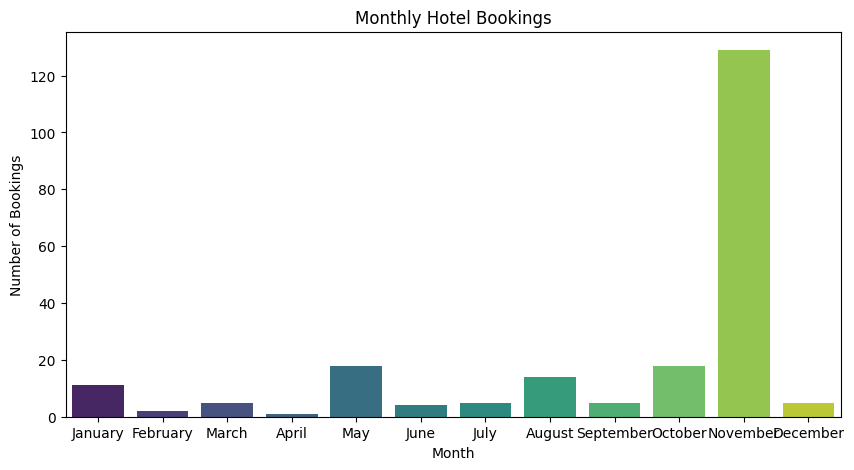

In [18]:
monthly_bookings=df['arrival_date_month'].value_counts().reindex(
    ['January','February','March','April','May','June','July','August','September','October','November','December']
)
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_bookings.index,y=monthly_bookings.values,palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Monthly Hotel Bookings')
plt.show()



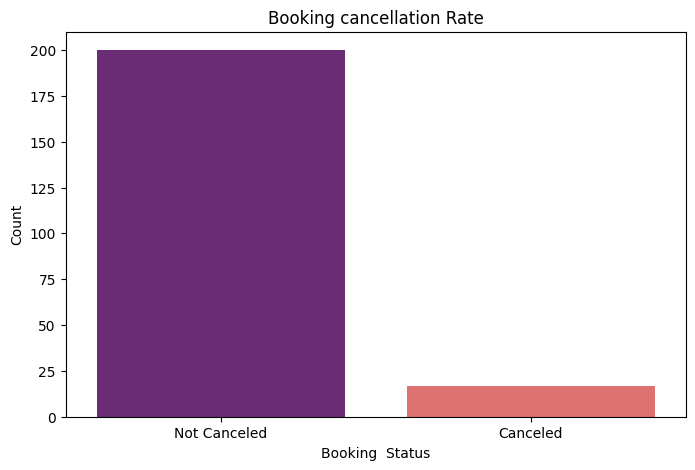

In [21]:
cancellation_counts=df['is_canceled'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=cancellation_counts.index,y=cancellation_counts.values,palette='magma')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.xlabel('Booking  Status')
plt.ylabel('Count')
plt.title('Booking cancellation Rate')
plt.show()

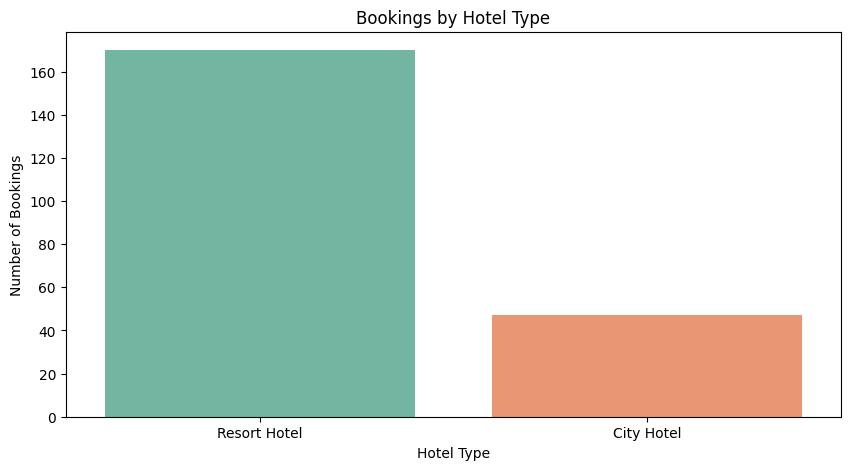

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='hotel', data=df, palette='Set2')
plt.xlabel("Hotel Type")
plt.ylabel("Number of Bookings")
plt.title("Bookings by Hotel Type")
plt.show()


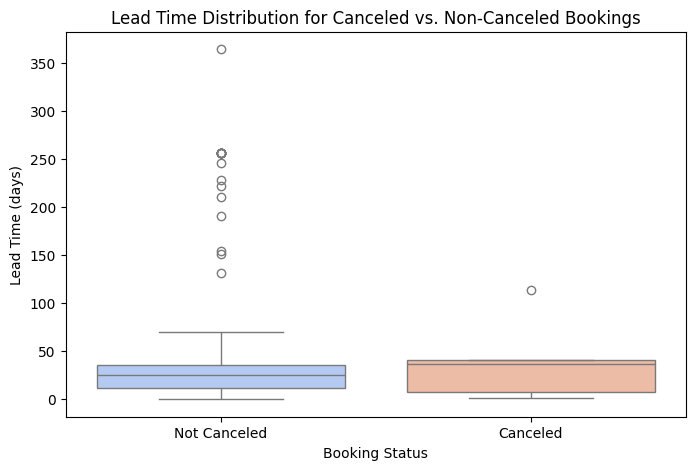

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='coolwarm')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.xlabel("Booking Status")
plt.ylabel("Lead Time (days)")
plt.title("Lead Time Distribution for Canceled vs. Non-Canceled Bookings")
plt.show()


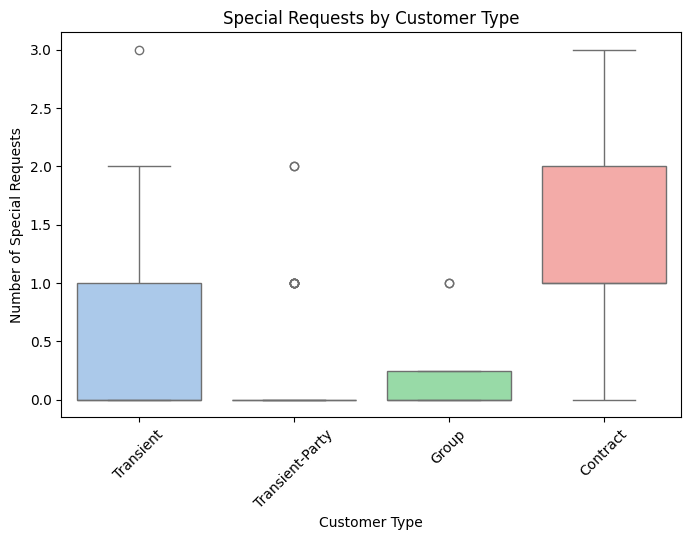

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='customer_type', y='total_of_special_requests', data=df, palette='pastel')
plt.xlabel("Customer Type")
plt.ylabel("Number of Special Requests")
plt.title("Special Requests by Customer Type")
plt.xticks(rotation=45)
plt.show()


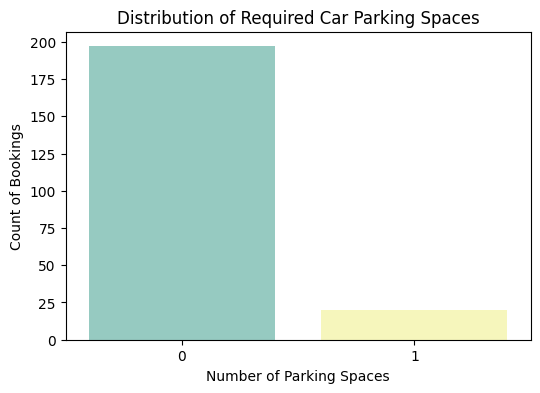

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='required_car_parking_spaces', data=df, palette='Set3')
plt.xlabel("Number of Parking Spaces")
plt.ylabel("Count of Bookings")
plt.title("Distribution of Required Car Parking Spaces")
plt.show()
